# Final Project Report

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record




In [152]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns

#% matplotlib inline



In [153]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

## Data Exploration

### Data Exploration - transcript.json

In [154]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


`time` is irrelevant to our data.

In [155]:
transcript.shape

(306534, 4)

In [156]:
transcript.columns

Index(['person', 'event', 'value', 'time'], dtype='object')

In [157]:
transcript.head(10)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
5,389bc3fa690240e798340f5a15918d5c,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
6,c4863c7985cf408faee930f111475da3,offer received,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},0
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
9,31dda685af34476cad5bc968bdb01c53,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0


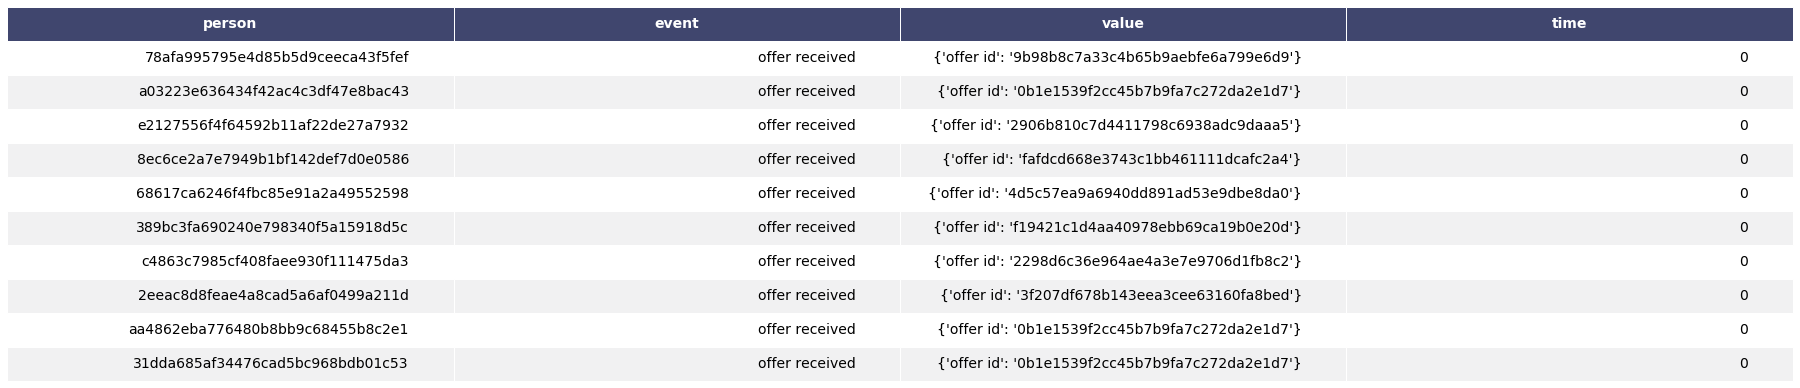

In [158]:
import six
import matplotlib.pyplot as plt
# function to turn Dataframe into a table image
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(transcript.head(10), header_columns=0, col_width=8)

In [159]:
#descriptive statistics summary
print(transcript.describe())

                time
count  306534.000000
mean      366.382940
std       200.326314
min         0.000000
25%       186.000000
50%       408.000000
75%       528.000000
max       714.000000


In [160]:
transcript['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

We can see that there are 4 unique events in transcript dataset: 'offer received', 'offer viewed', 'transaction', 'offer completed'

In [161]:
for event in transcript['event'].unique():
    display(event, transcript.loc[transcript['event'] == event].head())

'offer received'

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


'offer viewed'

,person,event,value,time
12650,389bc3fa690240e798340f5a15918d5c,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
12651,d1ede868e29245ea91818a903fec04c6,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},0
12652,102e9454054946fda62242d2e176fdce,offer viewed,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
12653,02c083884c7d45b39cc68e1314fec56c,offer viewed,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},0
12655,be8a5d1981a2458d90b255ddc7e0d174,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},0


'transaction'

,person,event,value,time
12654,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0
12659,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0


'offer completed'

,person,event,value,time
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,0
12672,fe97aa22dd3e48c8b143116a8403dd52,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,0
12679,629fc02d56414d91bca360decdfa9288,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,0
12692,676506bad68e4161b9bbaffeb039626b,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,0
12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer completed,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,0


In [162]:
# display the data where offers are completed
print(transcript[transcript['event'] == 'offer completed'] )

                                  person            event  \
12658   9fa9ae8f57894cc9a3b8a9bbe0fc1b2f  offer completed   
12672   fe97aa22dd3e48c8b143116a8403dd52  offer completed   
12679   629fc02d56414d91bca360decdfa9288  offer completed   
12692   676506bad68e4161b9bbaffeb039626b  offer completed   
12697   8f7dd3b2afe14c078eb4f6e6fe4ba97d  offer completed   
...                                  ...              ...   
306475  0c027f5f34dd4b9eba0a25785c611273  offer completed   
306497  a6f84f4e976f44508c358cc9aba6d2b3  offer completed   
306506  b895c57e8cd047a8872ce02aa54759d6  offer completed   
306509  8431c16f8e1d440880db371a68f82dd0  offer completed   
306527  24f56b5e1849462093931b164eb803b5  offer completed   

                                                    value  time  
12658   {'offer_id': '2906b810c7d4411798c6938adc9daaa5...     0  
12672   {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...     0  
12679   {'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...     0  
126

#### Obtain the Transactional Information where Offers are Viewed and Completed

In [163]:


transcript_offer_viewed = transcript.loc[transcript['event'] == 'offer viewed']

transcript_offer_completed = transcript.loc[transcript['event'] == 'offer completed']

temp_df = pd.DataFrame.from_records(transcript_offer_viewed.value.values.tolist()).stack().reset_index()
temp_df = temp_df.drop(['level_0', 'level_1'], axis=1)
temp_df.columns = ['offer_id']
# tease out the part where offers are viewed
transcript_offer_viewed = transcript_offer_viewed.reset_index(drop=True)
transcript_offer_viewed = transcript_offer_viewed.join(temp_df)
transcript_offer_viewed = transcript_offer_viewed.drop(['value','event', 'time'], axis=1)


from pandas.io.json import json_normalize
temp_df = json_normalize(transcript_offer_completed['value'])
# gather  the part where offers are completed
transcript_offer_completed = transcript_offer_completed.reset_index(drop=True)
transcript_offer_completed = transcript_offer_completed.join(temp_df)
transcript_offer_completed = transcript_offer_completed.drop(['value','event','time'], axis=1)




/Users/mengjialyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app


In [164]:
# merge the two datasets transcript_offer_viewed & transcript_offer_completed
# gather the dataset where offers are viewed and completed
transcript_offer_viewed_completed = pd.merge(transcript_offer_viewed, transcript_offer_completed, on=['offer_id','person'], how='inner')

#### Obtain the Transactional Information where Offers are Viewed and Not Completed

In [165]:
# gather the dataset where offers are viewed but not completed
transcript_offer_viewed_not_completed = transcript_offer_viewed.merge(transcript_offer_completed, how='left', indicator=True) 
transcript_offer_viewed_not_completed = transcript_offer_viewed_not_completed[transcript_offer_viewed_not_completed['_merge']=='left_only'].drop(['reward','_merge'], axis=1)

### Check for Missing Data in 'transcript.json'

In [166]:
#missing data transcript
transcript_total = transcript.isnull().sum().sort_values(ascending=False)
transcript_percent = (transcript.isnull().sum()/transcript.isnull().count()).sort_values(ascending=False)
transcript_missing_data = pd.concat([transcript_total, transcript_percent], axis=1, keys=['Total', 'Percent'])
transcript_missing_data.head(20)

,Total,Percent
time,0,0.0
value,0,0.0
event,0,0.0
person,0,0.0


### Data Exploration - profile.json

In [167]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


We can see that there are some missing values within income column.

In [168]:
profile.shape

(17000, 5)

In [169]:
profile.columns

Index(['gender', 'age', 'id', 'became_member_on', 'income'], dtype='object')

In [170]:
profile.head(10)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
9,None,118,8974fc5686fe429db53ddde067b88302,20161122,NaN


In [171]:
print(profile.dtypes)

gender               object
age                   int64
id                   object
became_member_on      int64
income              float64
dtype: object


#### Feature Transformation for `became_member_on`

In [172]:
# convert `became_member_on` to datetime format
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'],format='%Y%m%d')


In [173]:
# create membership_time feature
profile['membership_time'] = (pd.Timestamp.now().normalize() - profile['became_member_on'])
profile = profile.drop('became_member_on', axis=1)

### Check for Missing Data in 'profile.json'

In [174]:
#missing profile
profile_total = profile.isnull().sum().sort_values(ascending=False)
profile_percent = (profile.isnull().sum()/profile.isnull().count()).sort_values(ascending=False)
profile_missing_data = pd.concat([profile_total, profile_percent], axis=1, keys=['Total', 'Percent'])
profile_missing_data.head(20)

,Total,Percent
income,2175,0.127941
gender,2175,0.127941
membership_time,0,0.000000
id,0,0.000000
age,0,0.000000


There are 2175 missing values in each of the `income` and `gender` features. Next we check to see if the missing values in `income` appear in synchrony with those in `gender`.

In [175]:
profile_income_subset = profile[profile.income.isnull()]
profile_gender_subset = profile[profile.gender.isnull()]
# To find the comparison result 
profile_gender_subset.equals(profile_income_subset) 

True

We observe that the missing data in income and gender are distributed in the same way. 

The next step is to determine if the missing values are randomly distributed in the dataset.

The only column left besides income and gender is membership_time. Hence we can inspect if there is any relationship between the missing data and the membership_time column.

We can test if there exists any difference in the sample between the two data-sets by doing the t-test of mean difference among membership_time bewteen the partitioned datasets.



In [176]:
# t-test of mean difference
from scipy import stats
import random
## Cross Checking with the internal scipy function
a = profile[profile.income.isnull()].membership_time.dt.days
b = profile[profile.income.notnull()].sample(n=len(a), random_state=0).membership_time.dt.days
t2, p2 = stats.ttest_ind(a,b, equal_var=False)
print("t = " + str(t2))
print("p = " + str(p2))
len(a)
print(type(b))


t = -2.2581188927128357
p = 0.023989110333243364
<class 'pandas.core.series.Series'>


In [177]:
print("The average membership time where age and income is missing is", profile[profile.income.isnull()].membership_time.mean())
print("The average membership time where age and income is missing is", profile[profile.income.notnull()].membership_time.mean())

The average membership time where age and income is missing is 1255 days 04:06:17.379310
The average membership time where age and income is missing is 1294 days 11:29:44.580101


The p-value is 0.02, which is greater than 0.01, meaning that there does not exist significantly noticeable difference in the sample between the two data-sets.

Also the missing average and non-missing average are close, indicating the missing values does not have a substantial effect on our data.

Therefore we can drop or delete the missing values. 

In [178]:
# drop missing data

profile = profile.drop(profile.loc[profile['income'].isnull()].index)
profile = profile.drop(profile.loc[profile['gender'].isnull()].index)
profile.isnull().sum().max() #just checking that there's no missing data missing...

0

In [179]:
profile.head(10)

,gender,age,id,income,membership_time
1,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,1148 days
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1215 days
5,M,68,e2127556f4f64592b11af22de27a7932,70000.0,863 days
8,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,939 days
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,1029 days
13,F,61,aa4862eba776480b8bb9c68455b8c2e1,57000.0,1090 days
14,M,26,e12aeaf2d47d42479ea1c4ac3d8286c6,46000.0,2396 days
15,F,62,31dda685af34476cad5bc968bdb01c53,71000.0,1668 days
16,M,49,62cf5e10845442329191fc246e7bcea3,52000.0,2123 days
18,M,57,6445de3b47274c759400cd68131d91b4,42000.0,979 days


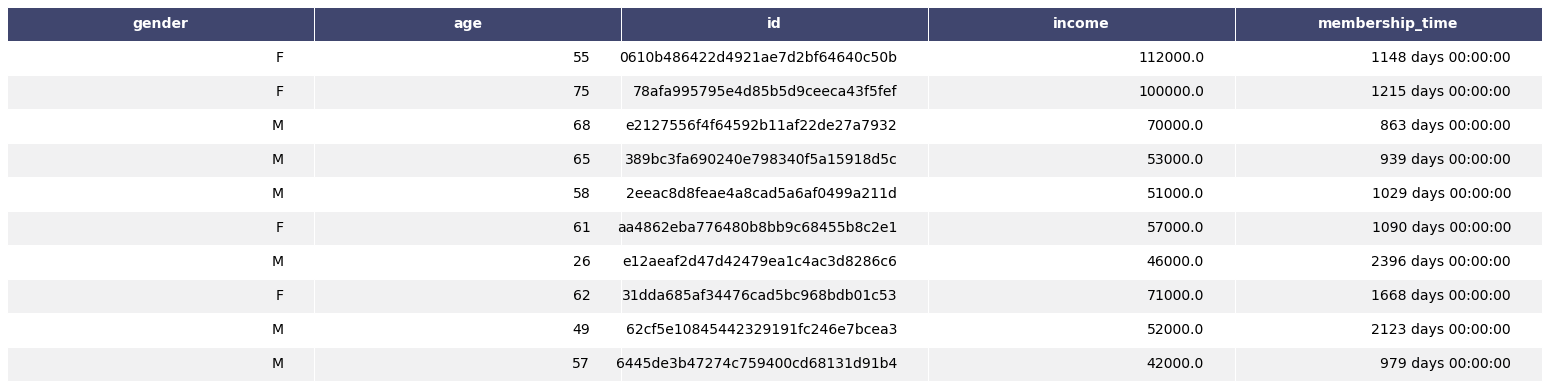

In [180]:

render_mpl_table(profile.head(10), header_columns=0, col_width=5.5)

#### Obtain the Profiling&Offer Information where Offers are Viewed and Completed

In [181]:
profile_offer_viewed_completed = pd.merge(profile, transcript_offer_viewed_completed, left_on='id', right_on='person', how='inner')

profile_offer_viewed_completed.head(10)

,gender,age,id,income,membership_time,person,offer_id,reward
0,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1215 days,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,5
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1215 days,78afa995795e4d85b5d9ceeca43f5fef,ae264e3637204a6fb9bb56bc8210ddfd,10
2,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1215 days,78afa995795e4d85b5d9ceeca43f5fef,f19421c1d4aa40978ebb69ca19b0e20d,5
3,M,68,e2127556f4f64592b11af22de27a7932,70000.0,863 days,e2127556f4f64592b11af22de27a7932,9b98b8c7a33c4b65b9aebfe6a799e6d9,5
4,M,68,e2127556f4f64592b11af22de27a7932,70000.0,863 days,e2127556f4f64592b11af22de27a7932,fafdcd668e3743c1bb461111dcafc2a4,2
5,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,939 days,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,5
6,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,939 days,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,5
7,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,939 days,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,5
8,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,939 days,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,5
9,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,939 days,389bc3fa690240e798340f5a15918d5c,9b98b8c7a33c4b65b9aebfe6a799e6d9,5


In [182]:
profile_offer_viewed_completed['id'].equals(profile_offer_viewed_completed['person'])
profile_offer_viewed_completed.drop('id', axis=1, inplace=True)

In [183]:
# check if `id` is dropped
profile_offer_viewed_completed.head(10)

,gender,age,income,membership_time,person,offer_id,reward
0,F,75,100000.0,1215 days,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,5
1,F,75,100000.0,1215 days,78afa995795e4d85b5d9ceeca43f5fef,ae264e3637204a6fb9bb56bc8210ddfd,10
2,F,75,100000.0,1215 days,78afa995795e4d85b5d9ceeca43f5fef,f19421c1d4aa40978ebb69ca19b0e20d,5
3,M,68,70000.0,863 days,e2127556f4f64592b11af22de27a7932,9b98b8c7a33c4b65b9aebfe6a799e6d9,5
4,M,68,70000.0,863 days,e2127556f4f64592b11af22de27a7932,fafdcd668e3743c1bb461111dcafc2a4,2
5,M,65,53000.0,939 days,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,5
6,M,65,53000.0,939 days,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,5
7,M,65,53000.0,939 days,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,5
8,M,65,53000.0,939 days,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,5
9,M,65,53000.0,939 days,389bc3fa690240e798340f5a15918d5c,9b98b8c7a33c4b65b9aebfe6a799e6d9,5


#### Obtain the Profiling&Offer Information where Offers are Viewed and Not Completed

In [184]:
profile_offer_viewed_not_completed = pd.merge(profile, transcript_offer_viewed_not_completed, left_on='id', right_on='person', how='inner')

In [185]:
profile_offer_viewed_not_completed['id'].equals(profile_offer_viewed_not_completed['person'])

True

In [186]:
profile_offer_viewed_not_completed = profile_offer_viewed_not_completed.drop('id', axis=1)
profile_offer_viewed_not_completed.head(10)


,gender,age,income,membership_time,person,offer_id
0,F,75,100000.0,1215 days,78afa995795e4d85b5d9ceeca43f5fef,5a8bc65990b245e5a138643cd4eb9837
1,M,68,70000.0,863 days,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5
2,M,58,51000.0,1029 days,2eeac8d8feae4a8cad5a6af0499a211d,2298d6c36e964ae4a3e7e9706d1fb8c2
3,F,61,57000.0,1090 days,aa4862eba776480b8bb9c68455b8c2e1,0b1e1539f2cc45b7b9fa7c272da2e1d7
4,F,61,57000.0,1090 days,aa4862eba776480b8bb9c68455b8c2e1,5a8bc65990b245e5a138643cd4eb9837
5,M,26,46000.0,2396 days,e12aeaf2d47d42479ea1c4ac3d8286c6,ae264e3637204a6fb9bb56bc8210ddfd
6,F,62,71000.0,1668 days,31dda685af34476cad5bc968bdb01c53,0b1e1539f2cc45b7b9fa7c272da2e1d7
7,M,49,52000.0,2123 days,62cf5e10845442329191fc246e7bcea3,5a8bc65990b245e5a138643cd4eb9837
8,F,61,40000.0,858 days,a448667f336b42c9a66fc5ffd5d73772,ae264e3637204a6fb9bb56bc8210ddfd
9,F,61,40000.0,858 days,a448667f336b42c9a66fc5ffd5d73772,5a8bc65990b245e5a138643cd4eb9837


### Data Exploration - portfolio.json

In [187]:
portfolio.shape

(10, 6)

In [188]:
portfolio.columns


Index(['reward', 'channels', 'difficulty', 'duration', 'offer_type', 'id'], dtype='object')

In [189]:


portfolio.head(5)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


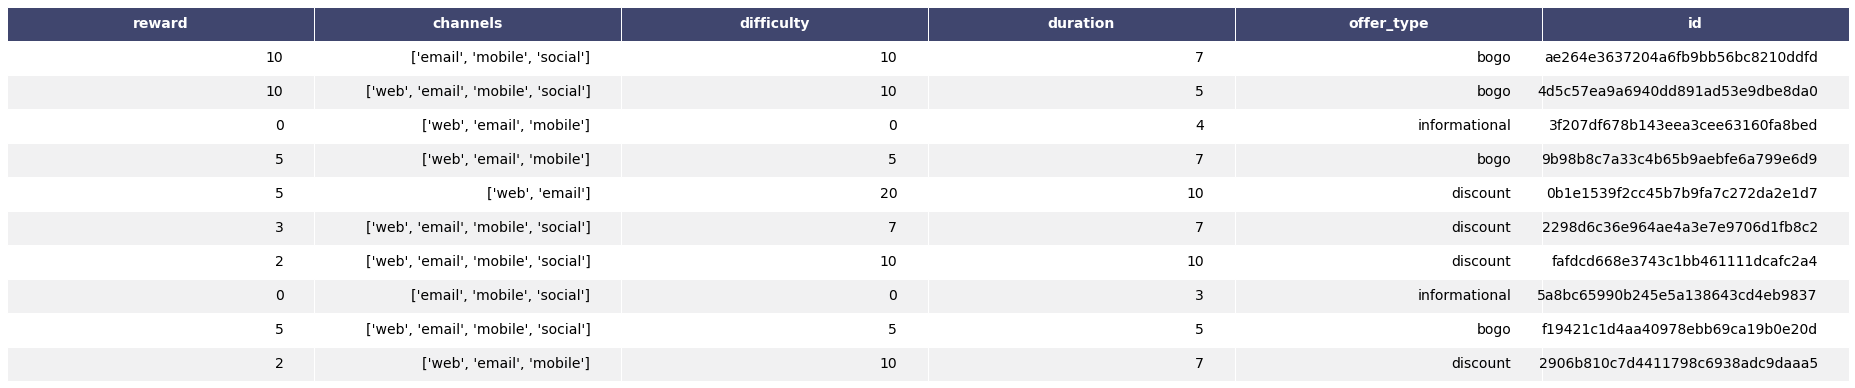

In [190]:




render_mpl_table(portfolio.head(10), header_columns=0, col_width=5.5)

### Check for Missing Data in 'portfolio.json'

In [191]:
# no missing data in portfolio
portfolio_total = portfolio.isnull().sum().sort_values(ascending=False)
portfolio_percent = (portfolio.isnull().sum()/portfolio.isnull().count()).sort_values(ascending=False)
portfolio_missing_data = pd.concat([portfolio_total, portfolio_percent], axis=1, keys=['Total', 'Percent'])
portfolio_missing_data.head(20)

,Total,Percent
id,0,0.0
offer_type,0,0.0
duration,0,0.0
difficulty,0,0.0
channels,0,0.0
reward,0,0.0


We can see that there are no missing values in the portfolio dataset.

#### Obtain the Portfolio&Profiling&Offer Information where Offers are Viewed and Completed

In [192]:
portfolio_profile_offer_viewed_completed = pd.merge(portfolio, profile_offer_viewed_completed, left_on='id', right_on='offer_id', how='inner')

portfolio_profile_offer_viewed_completed.head(10)


,reward_x,channels,difficulty,duration,offer_type,id,gender,age,income,membership_time,person,offer_id,reward_y
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,F,75,100000.0,1215 days,78afa995795e4d85b5d9ceeca43f5fef,ae264e3637204a6fb9bb56bc8210ddfd,10
1,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,F,61,57000.0,1090 days,aa4862eba776480b8bb9c68455b8c2e1,ae264e3637204a6fb9bb56bc8210ddfd,10
2,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,M,49,52000.0,2123 days,62cf5e10845442329191fc246e7bcea3,ae264e3637204a6fb9bb56bc8210ddfd,10
3,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,M,64,100000.0,1092 days,4b0da7e80e5945209a1fdddfe813dbe0,ae264e3637204a6fb9bb56bc8210ddfd,10
4,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,M,64,100000.0,1092 days,4b0da7e80e5945209a1fdddfe813dbe0,ae264e3637204a6fb9bb56bc8210ddfd,10
5,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,F,69,57000.0,1483 days,102e9454054946fda62242d2e176fdce,ae264e3637204a6fb9bb56bc8210ddfd,10
6,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,F,79,48000.0,1970 days,a3b9b4bf115e4564933ea2e4bc936843,ae264e3637204a6fb9bb56bc8210ddfd,10
7,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,F,78,93000.0,1427 days,fe8264108d5b4f198453bbb1fa7ca6c9,ae264e3637204a6fb9bb56bc8210ddfd,10
8,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,M,63,56000.0,785 days,ca82e1ebc759402c8ab95c341755bdf1,ae264e3637204a6fb9bb56bc8210ddfd,10
9,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,F,53,72000.0,1522 days,8c7df0c393db488aac3e58b06a7ea5f9,ae264e3637204a6fb9bb56bc8210ddfd,10


We observe that there are two seemingly identical columns generated after the merge: `reward_x` and `reward_y`. We want to check if the two features are the same.

In [193]:
portfolio_profile_offer_viewed_completed['reward_x'].equals(portfolio_profile_offer_viewed_completed['reward_y'])


True

Since `reward_x` and `reward_y` carry the same information, we drop one of them and rename the other to `reward`.

In [194]:
portfolio_profile_offer_viewed_completed.drop('reward_x', axis=1, inplace=True)
portfolio_profile_offer_viewed_completed.rename(columns={'reward_y':'reward'}, inplace=True)


In [195]:
portfolio_profile_offer_viewed_completed.head(10)

,channels,difficulty,duration,offer_type,id,gender,age,income,membership_time,person,offer_id,reward
0,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,F,75,100000.0,1215 days,78afa995795e4d85b5d9ceeca43f5fef,ae264e3637204a6fb9bb56bc8210ddfd,10
1,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,F,61,57000.0,1090 days,aa4862eba776480b8bb9c68455b8c2e1,ae264e3637204a6fb9bb56bc8210ddfd,10
2,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,M,49,52000.0,2123 days,62cf5e10845442329191fc246e7bcea3,ae264e3637204a6fb9bb56bc8210ddfd,10
3,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,M,64,100000.0,1092 days,4b0da7e80e5945209a1fdddfe813dbe0,ae264e3637204a6fb9bb56bc8210ddfd,10
4,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,M,64,100000.0,1092 days,4b0da7e80e5945209a1fdddfe813dbe0,ae264e3637204a6fb9bb56bc8210ddfd,10
5,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,F,69,57000.0,1483 days,102e9454054946fda62242d2e176fdce,ae264e3637204a6fb9bb56bc8210ddfd,10
6,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,F,79,48000.0,1970 days,a3b9b4bf115e4564933ea2e4bc936843,ae264e3637204a6fb9bb56bc8210ddfd,10
7,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,F,78,93000.0,1427 days,fe8264108d5b4f198453bbb1fa7ca6c9,ae264e3637204a6fb9bb56bc8210ddfd,10
8,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,M,63,56000.0,785 days,ca82e1ebc759402c8ab95c341755bdf1,ae264e3637204a6fb9bb56bc8210ddfd,10
9,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,F,53,72000.0,1522 days,8c7df0c393db488aac3e58b06a7ea5f9,ae264e3637204a6fb9bb56bc8210ddfd,10


Again, we observe that there are two seemingly identical columns generated after the merge: `id` and `offer_id`. We want to check if the two features are the same.

In [196]:
portfolio_profile_offer_viewed_completed['id'].equals(portfolio_profile_offer_viewed_completed['offer_id'])

True

We find out that `id` and `offer_id` carry the same information, and offer ids are strings that are not meaningful predictors. Therefore we can drop these feature columns. 

In [197]:
portfolio_profile_offer_viewed_completed = portfolio_profile_offer_viewed_completed.drop(['id','offer_id','person'], axis=1)
portfolio_profile_offer_viewed_completed.head(10)

,channels,difficulty,duration,offer_type,gender,age,income,membership_time,reward
0,"[email, mobile, social]",10,7,bogo,F,75,100000.0,1215 days,10
1,"[email, mobile, social]",10,7,bogo,F,61,57000.0,1090 days,10
2,"[email, mobile, social]",10,7,bogo,M,49,52000.0,2123 days,10
3,"[email, mobile, social]",10,7,bogo,M,64,100000.0,1092 days,10
4,"[email, mobile, social]",10,7,bogo,M,64,100000.0,1092 days,10
5,"[email, mobile, social]",10,7,bogo,F,69,57000.0,1483 days,10
6,"[email, mobile, social]",10,7,bogo,F,79,48000.0,1970 days,10
7,"[email, mobile, social]",10,7,bogo,F,78,93000.0,1427 days,10
8,"[email, mobile, social]",10,7,bogo,M,63,56000.0,785 days,10
9,"[email, mobile, social]",10,7,bogo,F,53,72000.0,1522 days,10


Now we can add the label column `outcome` to our dataframe. 

The binary outcome is our target for prediction/classification algorithm.

In [198]:
# add label
portfolio_profile_offer_viewed_completed['outcome']=1
portfolio_profile_offer_viewed_completed.head(10)

,channels,difficulty,duration,offer_type,gender,age,income,membership_time,reward,outcome
0,"[email, mobile, social]",10,7,bogo,F,75,100000.0,1215 days,10,1
1,"[email, mobile, social]",10,7,bogo,F,61,57000.0,1090 days,10,1
2,"[email, mobile, social]",10,7,bogo,M,49,52000.0,2123 days,10,1
3,"[email, mobile, social]",10,7,bogo,M,64,100000.0,1092 days,10,1
4,"[email, mobile, social]",10,7,bogo,M,64,100000.0,1092 days,10,1
5,"[email, mobile, social]",10,7,bogo,F,69,57000.0,1483 days,10,1
6,"[email, mobile, social]",10,7,bogo,F,79,48000.0,1970 days,10,1
7,"[email, mobile, social]",10,7,bogo,F,78,93000.0,1427 days,10,1
8,"[email, mobile, social]",10,7,bogo,M,63,56000.0,785 days,10,1
9,"[email, mobile, social]",10,7,bogo,F,53,72000.0,1522 days,10,1


#### Obtain the Portfolio&Profiling&Offer Information where Offers are Viewed and Not Completed

In [199]:
portfolio_profile_offer_viewed_not_completed = pd.merge(portfolio, profile_offer_viewed_not_completed, left_on='id', right_on='offer_id', how='inner')

portfolio_profile_offer_viewed_not_completed.head(10)
portfolio_profile_offer_viewed_not_completed['id'].equals(portfolio_profile_offer_viewed_not_completed['offer_id'])

True

In [200]:
portfolio_profile_offer_viewed_not_completed = portfolio_profile_offer_viewed_not_completed.drop(['id','offer_id','person'],axis=1)


In [201]:
portfolio_profile_offer_viewed_not_completed.head(10)

,reward,channels,difficulty,duration,offer_type,gender,age,income,membership_time
0,10,"[email, mobile, social]",10,7,bogo,M,26,46000.0,2396 days
1,10,"[email, mobile, social]",10,7,bogo,F,61,40000.0,858 days
2,10,"[email, mobile, social]",10,7,bogo,M,22,70000.0,1076 days
3,10,"[email, mobile, social]",10,7,bogo,M,40,33000.0,1519 days
4,10,"[email, mobile, social]",10,7,bogo,F,20,30000.0,1517 days
5,10,"[email, mobile, social]",10,7,bogo,F,69,37000.0,2544 days
6,10,"[email, mobile, social]",10,7,bogo,F,69,37000.0,2544 days
7,10,"[email, mobile, social]",10,7,bogo,F,41,41000.0,1811 days
8,10,"[email, mobile, social]",10,7,bogo,F,66,38000.0,881 days
9,10,"[email, mobile, social]",10,7,bogo,M,45,48000.0,1065 days


In [202]:
portfolio_profile_offer_viewed_not_completed['outcome'] = 0
portfolio_profile_offer_viewed_not_completed.head(10)

,reward,channels,difficulty,duration,offer_type,gender,age,income,membership_time,outcome
0,10,"[email, mobile, social]",10,7,bogo,M,26,46000.0,2396 days,0
1,10,"[email, mobile, social]",10,7,bogo,F,61,40000.0,858 days,0
2,10,"[email, mobile, social]",10,7,bogo,M,22,70000.0,1076 days,0
3,10,"[email, mobile, social]",10,7,bogo,M,40,33000.0,1519 days,0
4,10,"[email, mobile, social]",10,7,bogo,F,20,30000.0,1517 days,0
5,10,"[email, mobile, social]",10,7,bogo,F,69,37000.0,2544 days,0
6,10,"[email, mobile, social]",10,7,bogo,F,69,37000.0,2544 days,0
7,10,"[email, mobile, social]",10,7,bogo,F,41,41000.0,1811 days,0
8,10,"[email, mobile, social]",10,7,bogo,F,66,38000.0,881 days,0
9,10,"[email, mobile, social]",10,7,bogo,M,45,48000.0,1065 days,0


In [203]:
print(portfolio_profile_offer_viewed_completed.columns, portfolio_profile_offer_viewed_not_completed.columns)
cols =  portfolio_profile_offer_viewed_completed.columns.tolist()
portfolio_profile_offer_viewed_not_completed = portfolio_profile_offer_viewed_not_completed[cols]

Index(['channels', 'difficulty', 'duration', 'offer_type', 'gender', 'age',
       'income', 'membership_time', 'reward', 'outcome'],
      dtype='object') Index(['reward', 'channels', 'difficulty', 'duration', 'offer_type', 'gender',
       'age', 'income', 'membership_time', 'outcome'],
      dtype='object')


#### Obtain the Portfolio&Profiling&Offer Information where Offers are Viewed
Now we can combine the two datasets to arrive at the information on portfolio, profile and offer that are viewed. 

In [204]:
portfolio_combined = portfolio_profile_offer_viewed_completed.append(portfolio_profile_offer_viewed_not_completed)

In [205]:
portfolio_combined.shape
portfolio_combined.head(10)
portfolio_combined.dtypes

channels                    object
difficulty                   int64
duration                     int64
offer_type                  object
gender                      object
age                          int64
income                     float64
membership_time    timedelta64[ns]
reward                       int64
outcome                      int64
dtype: object

In [206]:
portfolio_combined = pd.concat([portfolio_combined, pd.get_dummies(portfolio_combined['offer_type'], prefix='offer')],axis=1)

In [207]:
portfolio_combined.head(10)
portfolio_combined = portfolio_combined.drop('offer_type', axis=1)

Using `MultiLabelBinarizer` from sklearn, we can turn `channels` into operational dummy variables.

In [208]:
# one hot encoding - channels
from sklearn.preprocessing import MultiLabelBinarizer



s = portfolio_combined['channels']

mlb = MultiLabelBinarizer()

dummies = pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=portfolio_combined.index)

In [209]:
portfolio_combined = pd.concat([portfolio_combined, dummies],axis=1)

In [210]:
portfolio_combined.rename(columns={ portfolio_combined.columns[-1]: "channel_web", portfolio_combined.columns[-2]: "channel_social", portfolio_combined.columns[-3]:"channel_mobile", portfolio_combined.columns[-4]:"channel_email"}, inplace = True)

In [211]:
portfolio_combined.head(10)

,channels,difficulty,duration,gender,age,income,membership_time,reward,outcome,offer_bogo,offer_discount,offer_informational,channel_email,channel_mobile,channel_social,channel_web
0,"[email, mobile, social]",10,7,F,75,100000.0,1215 days,10,1,1,0,0,1,1,1,0
1,"[email, mobile, social]",10,7,F,61,57000.0,1090 days,10,1,1,0,0,1,1,1,0
2,"[email, mobile, social]",10,7,M,49,52000.0,2123 days,10,1,1,0,0,1,1,1,0
3,"[email, mobile, social]",10,7,M,64,100000.0,1092 days,10,1,1,0,0,1,1,1,0
4,"[email, mobile, social]",10,7,M,64,100000.0,1092 days,10,1,1,0,0,1,1,1,0
5,"[email, mobile, social]",10,7,F,69,57000.0,1483 days,10,1,1,0,0,1,1,1,0
6,"[email, mobile, social]",10,7,F,79,48000.0,1970 days,10,1,1,0,0,1,1,1,0
7,"[email, mobile, social]",10,7,F,78,93000.0,1427 days,10,1,1,0,0,1,1,1,0
8,"[email, mobile, social]",10,7,M,63,56000.0,785 days,10,1,1,0,0,1,1,1,0
9,"[email, mobile, social]",10,7,F,53,72000.0,1522 days,10,1,1,0,0,1,1,1,0


In [212]:
portfolio_combined = portfolio_combined.drop('channels', axis=1)

In [213]:
portfolio_combined.head(10)

,difficulty,duration,gender,age,income,membership_time,reward,outcome,offer_bogo,offer_discount,offer_informational,channel_email,channel_mobile,channel_social,channel_web
0,10,7,F,75,100000.0,1215 days,10,1,1,0,0,1,1,1,0
1,10,7,F,61,57000.0,1090 days,10,1,1,0,0,1,1,1,0
2,10,7,M,49,52000.0,2123 days,10,1,1,0,0,1,1,1,0
3,10,7,M,64,100000.0,1092 days,10,1,1,0,0,1,1,1,0
4,10,7,M,64,100000.0,1092 days,10,1,1,0,0,1,1,1,0
5,10,7,F,69,57000.0,1483 days,10,1,1,0,0,1,1,1,0
6,10,7,F,79,48000.0,1970 days,10,1,1,0,0,1,1,1,0
7,10,7,F,78,93000.0,1427 days,10,1,1,0,0,1,1,1,0
8,10,7,M,63,56000.0,785 days,10,1,1,0,0,1,1,1,0
9,10,7,F,53,72000.0,1522 days,10,1,1,0,0,1,1,1,0


In [214]:
# check the gender types available
portfolio_combined.gender.unique()

array(['F', 'M', 'O'], dtype=object)

Using `replace` function, we can turn `gender` into operational dummy variables.

In [215]:
portfolio_combined['gender'] = portfolio_combined['gender'].replace({'F': 'female', 'M': 'male', 'O': 'other'})

In [216]:
portfolio_combined = pd.concat([portfolio_combined, pd.get_dummies(portfolio_combined['gender'], prefix='gender')],axis=1)

In [217]:
portfolio_combined.head(10)

,difficulty,duration,gender,age,income,membership_time,reward,outcome,offer_bogo,offer_discount,offer_informational,channel_email,channel_mobile,channel_social,channel_web,gender_female,gender_male,gender_other
0,10,7,female,75,100000.0,1215 days,10,1,1,0,0,1,1,1,0,1,0,0
1,10,7,female,61,57000.0,1090 days,10,1,1,0,0,1,1,1,0,1,0,0
2,10,7,male,49,52000.0,2123 days,10,1,1,0,0,1,1,1,0,0,1,0
3,10,7,male,64,100000.0,1092 days,10,1,1,0,0,1,1,1,0,0,1,0
4,10,7,male,64,100000.0,1092 days,10,1,1,0,0,1,1,1,0,0,1,0
5,10,7,female,69,57000.0,1483 days,10,1,1,0,0,1,1,1,0,1,0,0
6,10,7,female,79,48000.0,1970 days,10,1,1,0,0,1,1,1,0,1,0,0
7,10,7,female,78,93000.0,1427 days,10,1,1,0,0,1,1,1,0,1,0,0
8,10,7,male,63,56000.0,785 days,10,1,1,0,0,1,1,1,0,0,1,0
9,10,7,female,53,72000.0,1522 days,10,1,1,0,0,1,1,1,0,1,0,0


In [218]:
# drop gender column
portfolio_combined.drop("gender", axis=1, inplace=True)

In [219]:
portfolio_combined.head(10)

,difficulty,duration,age,income,membership_time,reward,outcome,offer_bogo,offer_discount,offer_informational,channel_email,channel_mobile,channel_social,channel_web,gender_female,gender_male,gender_other
0,10,7,75,100000.0,1215 days,10,1,1,0,0,1,1,1,0,1,0,0
1,10,7,61,57000.0,1090 days,10,1,1,0,0,1,1,1,0,1,0,0
2,10,7,49,52000.0,2123 days,10,1,1,0,0,1,1,1,0,0,1,0
3,10,7,64,100000.0,1092 days,10,1,1,0,0,1,1,1,0,0,1,0
4,10,7,64,100000.0,1092 days,10,1,1,0,0,1,1,1,0,0,1,0
5,10,7,69,57000.0,1483 days,10,1,1,0,0,1,1,1,0,1,0,0
6,10,7,79,48000.0,1970 days,10,1,1,0,0,1,1,1,0,1,0,0
7,10,7,78,93000.0,1427 days,10,1,1,0,0,1,1,1,0,1,0,0
8,10,7,63,56000.0,785 days,10,1,1,0,0,1,1,1,0,0,1,0
9,10,7,53,72000.0,1522 days,10,1,1,0,0,1,1,1,0,1,0,0


In [220]:
# move outcome to the last column
cols = list(portfolio_combined.columns.values) #Make a list of all of the columns in the df
cols.pop(cols.index('outcome')) #Remove b from list

portfolio_combined = portfolio_combined[cols+['outcome']] 

In [221]:
portfolio_combined.head(10)
portfolio_combined.dtypes



difficulty                       int64
duration                         int64
age                              int64
income                         float64
membership_time        timedelta64[ns]
reward                           int64
offer_bogo                       uint8
offer_discount                   uint8
offer_informational              uint8
channel_email                    int64
channel_mobile                   int64
channel_social                   int64
channel_web                      int64
gender_female                    uint8
gender_male                      uint8
gender_other                     uint8
outcome                          int64
dtype: object

We can see that `membership_time` is of the non-integer type `datetime`. To make the data work in our classification algorithm, we need to transform it to an integer type.

In [222]:
portfolio_combined['membership_time'] = portfolio_combined['membership_time'].dt.days


In [223]:
portfolio_combined.head(10)
portfolio_combined.dtypes

difficulty               int64
duration                 int64
age                      int64
income                 float64
membership_time          int64
reward                   int64
offer_bogo               uint8
offer_discount           uint8
offer_informational      uint8
channel_email            int64
channel_mobile           int64
channel_social           int64
channel_web              int64
gender_female            uint8
gender_male              uint8
gender_other             uint8
outcome                  int64
dtype: object

### Outlier Detection

Our data is unlikely to come from a Gaussian distribution. 


One criteria for extreme outlier can be defined as +/- 3*IQR deviations from the the Q1/Q3.  

Here we have 6 continuous variables to check for outliers: 
* difficulty
* age
* income
* duration
* reward
* membership_time

Next we will define a function `remove_outlier` to remove outliers one feature at a time.

In [224]:

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    #Calculate the inner and outer lower fences

    fence_low  = q1- 3*iqr
    #Calculate the inner and outer higher fences
    fence_high = q3+ 3*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

# remove outlier in difficulty feature column
portfolio_combined_1 = remove_outlier(portfolio_combined, 'difficulty')
deleted_rows_1 = portfolio_combined.shape[0] - portfolio_combined_1.shape[0]
print("The number of deleted row after removing outliers in difficulty is", deleted_rows_1)

# remove outlier in duration feature column
portfolio_combined_2 = remove_outlier(portfolio_combined_1, 'duration')
deleted_rows_2 = portfolio_combined_1.shape[0] - portfolio_combined_2.shape[0]
print("The number of deleted row after removing outliers in duration is", deleted_rows_2)

# remove outlier in age feature column
portfolio_combined_3 = remove_outlier(portfolio_combined_2, 'age')
deleted_rows_3 = portfolio_combined_2.shape[0] - portfolio_combined_3.shape[0]
print("The number of deleted row after removing outliers in age is", deleted_rows_3)

# remove outlier in income feature column
portfolio_combined_4 = remove_outlier(portfolio_combined_3, 'income')
deleted_rows_4 = portfolio_combined_3.shape[0] - portfolio_combined_4.shape[0]
print("The number of deleted row after removing outliers in income is", deleted_rows_4)

# remove outlier in membership_time feature column
portfolio_combined_5 = remove_outlier(portfolio_combined_4, 'membership_time')
deleted_rows_5 = portfolio_combined_4.shape[0] - portfolio_combined_5.shape[0]
print("The number of deleted row after removing outliers in membership_time is", deleted_rows_5)

# remove outlier in reward feature column
portfolio_combined_6 = remove_outlier(portfolio_combined_5, 'reward')
deleted_rows_6 = portfolio_combined_5.shape[0] - portfolio_combined_6.shape[0]
print("The number of deleted row after removing outliers in reward is", deleted_rows_6)



The number of deleted row after removing outliers in difficulty is 0
The number of deleted row after removing outliers in duration is 0
The number of deleted row after removing outliers in age is 0
The number of deleted row after removing outliers in income is 0
The number of deleted row after removing outliers in membership_time is 0
The number of deleted row after removing outliers in reward is 0


No extreme outliers were found!

### Check for Duplicate Data in the Final Combined Dataset

In [225]:
#Identifying duplicate rows of data and removing them.
duplicateDFRow = portfolio_combined_6[portfolio_combined_6.duplicated()]
print(duplicateDFRow.shape, portfolio_combined_6.shape)

(15701, 17) (58187, 17)


We have 15701 duplicated rows. Next we are going to delete the deplicated data. 

In [226]:
# dropping duplicate values 
portfolio_combined_6.drop_duplicates(keep="first",inplace=True) 
portfolio_combined_6.shape
portfolio_combined_6.dtypes
portfolio_combined_6.head(10)

,difficulty,duration,age,income,membership_time,reward,offer_bogo,offer_discount,offer_informational,channel_email,channel_mobile,channel_social,channel_web,gender_female,gender_male,gender_other,outcome
0,10,7,75,100000.0,1215,10,1,0,0,1,1,1,0,1,0,0,1
1,10,7,61,57000.0,1090,10,1,0,0,1,1,1,0,1,0,0,1
2,10,7,49,52000.0,2123,10,1,0,0,1,1,1,0,0,1,0,1
3,10,7,64,100000.0,1092,10,1,0,0,1,1,1,0,0,1,0,1
5,10,7,69,57000.0,1483,10,1,0,0,1,1,1,0,1,0,0,1
6,10,7,79,48000.0,1970,10,1,0,0,1,1,1,0,1,0,0,1
7,10,7,78,93000.0,1427,10,1,0,0,1,1,1,0,1,0,0,1
8,10,7,63,56000.0,785,10,1,0,0,1,1,1,0,0,1,0,1
9,10,7,53,72000.0,1522,10,1,0,0,1,1,1,0,1,0,0,1
10,10,7,53,117000.0,1344,10,1,0,0,1,1,1,0,1,0,0,1


Now we have our final algorithm-ready dataset that contains all the predictors and target variables.

### Attribute Histograms for Continuous Variables

In [227]:
import matplotlib.pyplot as plt

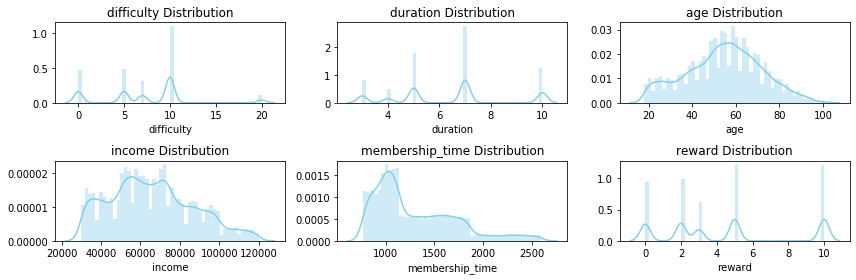

In [228]:
# function to draw histograms
import seaborn as sns

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        #df[var_name].hist(bins=10,ax=ax)
        sns.distplot( df[var_name] , color="skyblue")
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

draw_histograms(portfolio_combined_6, portfolio_combined_6.columns[0:6], 2,3)

As can be seen from the histograms, the data are not very evenly distributed. 

### Correlation Plot for Continuous Variables

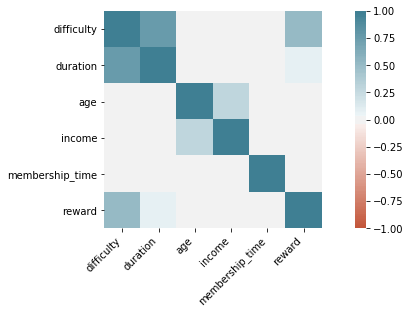

In [229]:
portfolio_subset = portfolio_combined_6[['difficulty','duration','age','income','membership_time','reward']]
corr = portfolio_subset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

We can see that `duration` and `difficulty`, `reward` and `difficulty` are highly correlated. `income` and `age` are also somewhat correlated.

In [230]:
print("The correlation coefficient between duration and difficulty is", portfolio_combined_6['difficulty'].corr(portfolio_combined_6['duration']))
print("The correlation coefficient between reward and difficulty is", portfolio_combined_6['difficulty'].corr(portfolio_combined_6['reward']))
#print("The correlation coefficient between duration and difficulty is", portfolio_combined_6['reward'].corr(portfolio_combined_6['duration']))

The correlation coefficient between duration and difficulty is 0.7586423833113695
The correlation coefficient between reward and difficulty is 0.5143246736547914


In general, an absolute correlation coefficient of >0.7 among two or more predictors indicates the presence of multicollinearity. Therfore, we can draw the conclusion that `duration` and `difficulty` are correlated. 

In [231]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(portfolio_combined_6.values, i) for i in range(portfolio_combined_6.shape[1])]

vif["features"] = portfolio_combined_6.columns


/Users/mengjialyu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/mengjialyu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [232]:
vif

,VIF Factor,features
0,25.244951,difficulty
1,5.682312,duration
2,1.104207,age
3,1.162895,income
4,1.048356,membership_time
5,18.510670,reward
6,inf,offer_bogo
7,inf,offer_discount
8,inf,offer_informational
9,0.000000,channel_email


We first remove the one with the highest VIF and calculate the VIFs again.

In [233]:
temp_df = portfolio_combined_6.drop('difficulty', axis=1)
temp_vif = pd.DataFrame()

temp_vif["VIF Factor"] = [variance_inflation_factor(temp_df.values, i) for i in range(temp_df.shape[1])]

temp_vif["features"] = temp_df.columns

/Users/mengjialyu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/mengjialyu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [234]:
temp_vif

,VIF Factor,features
0,4.452389,duration
1,1.104203,age
2,1.162766,income
3,1.048120,membership_time
4,5.953971,reward
5,inf,offer_bogo
6,inf,offer_discount
7,inf,offer_informational
8,0.000000,channel_email
9,1.611533,channel_mobile


After removing the `difficulty`, VIF for `reward` is brought down significantly and most other continuous variables have a VIF closed to the desired value 1.  

In [235]:
# officially drop the difficulty variable
portfolio_combined_6 = portfolio_combined_6.drop('difficulty', axis=1)

We would also want to check if the dataset if imbalanced.

In [236]:
portfolio_combined_6.outcome.value_counts()

1    23497
0    18989
Name: outcome, dtype: int64

There is 44.69% percent of cases belonging to one class and 55.3% for the other. Therefore we can conclude that it is not an imbalanced dataset.

### Feature Scaling/Data Normalization
Performing feature scaling can improve numerical stability and resolution and reduce training time.(https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0,https://machinelearningmastery.com/data-preparation-techniques-for-machine-learning/)
Also, some machine learning algorithms are sensitive to feature scaling.(https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)
Since our data does not follow a Gaussian distribution, we use normalization here rather than standardization.

In [237]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

X = portfolio_combined_6.iloc[:,:-1]
y = portfolio_combined_6.iloc[:,-1]
# fit scaler on training data
norm = MinMaxScaler().fit(X)


# transform training data
X_norm = norm.transform(X)
train_df = pd.DataFrame(X_norm, index=X.index, columns=X.columns)
train_df['outcome'] = y
# transform testing dataabs
#X_test_norm = norm.transform(X_test)

In [238]:
# spliting training and testing data
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_norm,y,test_size=0.2,random_state=42)

In [239]:
print(type(y))

<class 'pandas.core.series.Series'>


## Modeling and Algorithms

### 1.Benchmark Model - Naive Bayes Classifier

In [240]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
 
y_pred = nb_clf.predict(X_test)
 
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59      3741
           1       0.69      1.00      0.81      4757

    accuracy                           0.74      8498
   macro avg       0.84      0.71      0.70      8498
weighted avg       0.82      0.74      0.71      8498

[[1560 2181]
 [   0 4757]]
accuracy is 0.7433513767945399


For the benchmark model using Gaussian Naive Bayes, we obtain the accuracy score of 74.33%. Not too bad! We will see how we can boost our accuracy score using more sophisticated models.

In [241]:


print("AUC ROC:", roc_auc_score(y_test, y_pred))

AUC ROC: 0.7085004009623095


The AUC indicates the probability that the Naive Bayes model ranks a random  example more highly than a random negative example is 70.85%.

### 2.Decision Tree Model 

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X_norm,y,test_size=0.2,random_state=42)

In [243]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
dt_clf = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifer
dt_clf = dt_clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt_clf.predict(X_test)
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.73      0.72      3741
           1       0.78      0.77      0.77      4757

    accuracy                           0.75      8498
   macro avg       0.75      0.75      0.75      8498
weighted avg       0.75      0.75      0.75      8498

[[2721 1020]
 [1117 3640]]
Accuracy: 0.7485290656625089


We got an accuracy rate of 74.8%, slightly better than the Naive Bayes Classifier model. We may further improve this accuracy by tuning the parameters in the model, but let's first look at other models.

In [244]:

print("AUC ROC:", roc_auc_score(y_test, y_pred))

AUC ROC: 0.7462668866494638


The probability that the Naive Bayes model ranks a random positive instance more highly than a random negative instance is 74.6%.

### Support Vector Machine Model

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X_norm,y,test_size=0.2,random_state=42)

In [246]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svm_clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svm_clf.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.59      0.70      3741
           1       0.74      0.92      0.82      4757

    accuracy                           0.78      8498
   macro avg       0.80      0.75      0.76      8498
weighted avg       0.79      0.78      0.77      8498

[[2194 1547]
 [ 364 4393]]
Accuracy: 0.7751235584843492


The accuracy of the SVM model is 77.51%, slightly better than the decision tree model. 

In [247]:

print("AUC ROC:", roc_auc_score(y_test, y_pred))

AUC ROC: 0.7549776951896379


The probability that the Decision Tree model ranks a random positive instance more highly than a random negative instance is 75.5%, which is similar to the AUC of the Naive Bayes classifier.

### Random Forest Model

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X_norm,y,test_size=0.2,random_state=42)

In [249]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=20, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

[[2691 1050]
 [ 879 3878]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.74      3741
           1       0.79      0.82      0.80      4757

    accuracy                           0.77      8498
   macro avg       0.77      0.77      0.77      8498
weighted avg       0.77      0.77      0.77      8498

accuracy is 0.773005413038362


The accuracy of the Random Forest model is 77.4%, almost the same as the Support Vector Machine model.

In [250]:

print("AUC ROC:", roc_auc_score(y_test, y_pred))

AUC ROC: 0.7672730297932613


The probability that the Decision Tree model ranks a random positive instance more highly than a random negative instance is 76.83%, which is similar to the AUC of the Naive Bayes classifier.

### AdaBoost (Adaptive Boosting)

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X_norm,y,test_size=0.2,random_state=42)

In [252]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
ab_clf = AdaBoostClassifier(n_estimators=50,
                         learning_rate=0.1,
                           random_state=42)
# Train Adaboost Classifer
ab_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = ab_clf.predict(X_test)


print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

[[2224 1517]
 [ 374 4383]]
              precision    recall  f1-score   support

           0       0.86      0.59      0.70      3741
           1       0.74      0.92      0.82      4757

    accuracy                           0.78      8498
   macro avg       0.80      0.76      0.76      8498
weighted avg       0.79      0.78      0.77      8498

accuracy is 0.7774770534243352


The accuracy of the AdaBoost model is 77.75%, almost the same as the Random Forest/Support Vector Machine model.

In [253]:
print("AUC ROC:", roc_auc_score(y_test, y_pred))

AUC ROC: 0.7579362356699734


The probability that the AdaBoost model ranks a random positive instance more highly than a random negative instance is 75.8%, which is similar to the AUC of the Naive Bayes classifier.

### Neural Networks

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X_norm,y,test_size=0.2,random_state=42)

In [255]:

from sklearn.neural_network import MLPClassifier

# use 2 hidden layers with 5 and 2 neurons each
mlp_clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=42)
mlp_clf.fit(X_train, y_train)
y_pred = mlp_clf.predict(X_test)



print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))

[[2562 1179]
 [ 598 4159]]
              precision    recall  f1-score   support

           0       0.81      0.68      0.74      3741
           1       0.78      0.87      0.82      4757

    accuracy                           0.79      8498
   macro avg       0.79      0.78      0.78      8498
weighted avg       0.79      0.79      0.79      8498

accuracy is 0.7908919745822547


The accuracy of the Random Forest model is 78.77%, slightly better than the models above.

In [256]:
print("AUC ROC:", roc_auc_score(y_test, y_pred))

AUC ROC: 0.7795670719670451


The probability that the Neural Network model ranks a random positive instance more highly than a random negative instance is 78%, which is also better than the aforementioned classifiers.

### XGBoost (eXtreme Gradient Boosting)

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X_norm,y,test_size=0.2,random_state=42)

In [258]:
import sys
!{sys.executable} -m pip install xgboost

In [259]:
import xgboost
from xgboost import XGBClassifier
#params = {
#    "max_depth": 5,
#    "objective": "binary:logistic",
#    'n_estimators': 1000,
#    "learning_rate": 0.1,
#    "eval_metric": "logloss"
#}

#eval_set = [(X_train_norm, y_train), (X_test_norm, y_test)]

#model = xgb.train(params, , 3000, eval_set=eval_set, verbose_eval=200)



# fit model no training data
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('accuracy is',accuracy_score(y_pred,y_test))


[[2679 1062]
 [ 600 4157]]
              precision    recall  f1-score   support

           0       0.82      0.72      0.76      3741
           1       0.80      0.87      0.83      4757

    accuracy                           0.80      8498
   macro avg       0.81      0.79      0.80      8498
weighted avg       0.81      0.80      0.80      8498

accuracy is 0.8044245704871734


The accuracy for the model is 80.44%, slightly better than all the models above. Its f1-scores also outperforms those of other models.

In [260]:

print("AUC ROC:", roc_auc_score(y_test, y_pred))

AUC ROC: 0.7949943855161996


The probability that the XGBoost model ranks a random positive instance more highly than a random negative instance is 79.5%, which also outperforms all the other models.

Hence, we can confidently conclude that XGBoost has the best performance in terms of accuracy and AUC. Therefore we can now use Gridsearch to find the best hyperparameters suited to the model.

### XGBoost Hyperparameter Tuning

Using Gridsearch and the ROC-AUC metrics which measures the percentage of correct predictions, we can find out the best hyperparameters by comparing the results of 10-fold cross-validation https://www.mikulskibartosz.name/xgboost-hyperparameter-tuning-in-python-using-grid-search/ 

#### Step 1: Fix learning rate and number of estimators for tuning tree-based parameters

In [261]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import xgboost as xgb
rcParams['figure.figsize'] = 12, 4

msk = np.random.rand(len(train_df)) < 0.8
train = train_df[msk]
#test = df[~msk]

#train = pd.DataFrame(data=X_train,    # values
 #       columns=(portfolio_combined_6.drop('outcome',axis=1).columns))  # 1st row as the column names
target = 'outcome'


In [262]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, verbose_eval=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['outcome'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % accuracy_score(dtrain['outcome'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % roc_auc_score(dtrain['outcome'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.8354
AUC Score (Train): 0.917060


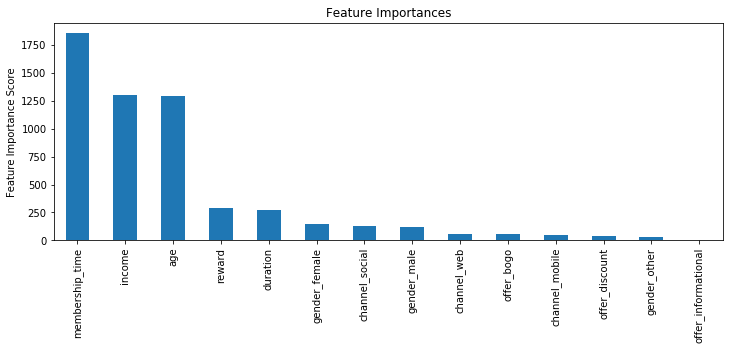

In [263]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in target]
# summary of initial params
#params = {
    # Parameters that we are going to tune.
 #   'max_depth':5,
  #  'min_child_weight': 1,
   # 'gamma': 0,
    #'eta':.3,
    #'subsample': 0.8,
    #'colsample_bytree': 0.8,
    # Other parameters
    #'objective':'binary:logistic',
    #'nthread': 4,
    #'scale_pos_weight': 1,
    #'seed': 27
#}
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, train, predictors)

We can see that now we get an accuracy score of 83.35% and the AUC score for our training dataset is 91.75%.

For our model the feature with the highest featuer importance is `membership_time`. It makes sense as the longer a customer has been a member, the more used to he or she is to shopping through the app and utilizing online offers.

#### Step 2: Tune Hyperparameters - `max_depth` and `min_child_weight`

For XGBoost models, `max_depth` and `min_child_weight` are the two most important hyperparameters

`max_depth` is the maximum number of nodes allowed from the root to the farthest leaf of a tree. Deeper trees can model more complex relationships by adding more nodes, but as we go deeper, splits become less relevant and are sometimes only due to noise, causing the model to overfit.

`min_child_weight` is the minimum weight (or number of samples if all samples have a weight of 1) required in order to create a new node in the tree. A smaller `min_child_weight` allows the algorithm to create children that correspond to fewer samples, thus allowing for more complex trees, but again, more likely to overfit. tune them together in order to find a good trade-off between model bias and variance

In [264]:
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=10)



In [265]:
gsearch1.fit(train[predictors],train[target])


/Users/mengjialyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140,...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=1,
                                     seed=27, subsample=0.8, tree_metho

In [266]:
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([1.41861434, 1.53352516, 1.62396865, 2.44018505, 2.42791066,
         2.41221335, 3.28471849, 3.31007245, 3.30685241, 4.20580359,
         4.06530228, 3.86465251]),
  'std_fit_time': array([0.03101416, 0.0715388 , 0.0300297 , 0.04206637, 0.02213996,
         0.03725758, 0.03502711, 0.04750275, 0.05145749, 0.03919107,
         0.03809086, 0.33912487]),
  'mean_score_time': array([0.00894082, 0.00998933, 0.01026642, 0.01230636, 0.01258645,
         0.01288133, 0.01646132, 0.01643486, 0.01614542, 0.02043645,
         0.02061973, 0.01931067]),
  'std_score_time': array([0.0004005 , 0.00067395, 0.00057186, 0.00035422, 0.00065874,
         0.000562  , 0.00054947, 0.00110401, 0.00049075, 0.00050731,
         0.00079164, 0.00215786]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
         

In [267]:
gsearch1.best_params_

{'max_depth': 9, 'min_child_weight': 1}

The ideal values are 9 for `max_depth` and 1 for `min_child_weight`. Lets go one step deeper and look for optimum values. We’ll search for values 1 above and below the optimum values because we took an interval of two.

In [278]:
param_test2 = {
 'max_depth':[8,9,10,11],
 'min_child_weight':[1,2]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch2.fit(train[predictors],train[target])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

/Users/mengjialyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([3.13983486, 3.34966638, 4.0128135 , 4.25944252, 4.743436  ,
         4.70188298, 5.03187139, 5.10534973]),
  'std_fit_time': array([0.1664331 , 0.05855103, 0.07415384, 0.15667191, 0.19081199,
         0.09169323, 0.07219267, 0.06100007]),
  'mean_score_time': array([0.01500361, 0.01636434, 0.02030873, 0.02047899, 0.02450447,
         0.02426274, 0.02986701, 0.02739246]),
  'std_score_time': array([0.00071114, 0.00125837, 0.00097986, 0.00080533, 0.00092954,
         0.00121415, 0.0011672 , 0.00245368]),
  'param_max_depth': masked_array(data=[8, 8, 9, 9, 10, 10, 11, 11],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 2, 1, 2, 1, 2, 1, 2],
               mask=[False, False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 8, 'min_child_weight': 1},
   {'ma

Here, we get the optimum values as 10 for `max_depth` and 1 for `min_child_weight`. The CV score does increase slightly compared to the first result.

Next we can tune hyperparameter `gamma`

#### Step 3: Tune Hyperparameter - `gamma`

In [279]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=10,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch3.fit(train[predictors],train[target])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

/Users/mengjialyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([4.10952716, 4.20598376, 4.33838723, 4.53829911, 4.24909728]),
  'std_fit_time': array([0.16519115, 0.07898489, 0.10924608, 0.11136751, 0.69427091]),
  'mean_score_time': array([0.02151008, 0.02319655, 0.02363868, 0.02392738, 0.02414281]),
  'std_score_time': array([0.00113954, 0.00086731, 0.00063879, 0.00081918, 0.00272286]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'split0_test_score': array([0.82080241, 0.82282485, 0.82036822, 0.82224077, 0.82177455]),
  'split1_test_score': array([0.80394385, 0.80457425, 0.80076055, 0.8039926 , 0.80602462]),
  'split2_test_score': array([0.90186399, 0.9009352 , 0.90111121, 0.90072054, 0.90219616]),
  'split3_test_score': array([1., 1., 1., 1., 1.]),
  'split4_test_score': array([0.3032911

Next we can narrow down our searches and try values around 0.4.

In [281]:
param_test3 = {
 'gamma':[i/100.0 for i in range(35,50,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=10,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch3.fit(train[predictors],train[target])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

/Users/mengjialyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([3.834305  , 4.17434916, 4.0378788 ]),
  'std_fit_time': array([0.20032387, 0.09293797, 0.61826714]),
  'mean_score_time': array([0.02123265, 0.02356057, 0.02263374]),
  'std_score_time': array([0.00128424, 0.00245044, 0.00248691]),
  'param_gamma': masked_array(data=[0.35, 0.4, 0.45],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.35}, {'gamma': 0.4}, {'gamma': 0.45}],
  'split0_test_score': array([0.82197336, 0.82177455, 0.81853187]),
  'split1_test_score': array([0.80297345, 0.80602462, 0.80281816]),
  'split2_test_score': array([0.90086434, 0.90219616, 0.90171183]),
  'split3_test_score': array([1., 1., 1.]),
  'split4_test_score': array([0.30289635, 0.30209883, 0.30230492]),
  'split5_test_score': array([0.6379385 , 0.64584703, 0.63521231]),
  'split6_test_score': array([0.99257211, 0.99296895, 0.99290972]),
  'split7_test_score': array([1., 1., 1.]),
  'split8_test_score': array([0

Therefore for `gamma` 0.4 is the optimum one. Before proceeding, a good idea would be to re-calibrate the number of boosting rounds for the updated parameters.


Model Report
Accuracy : 0.8814
AUC Score (Train): 0.954144


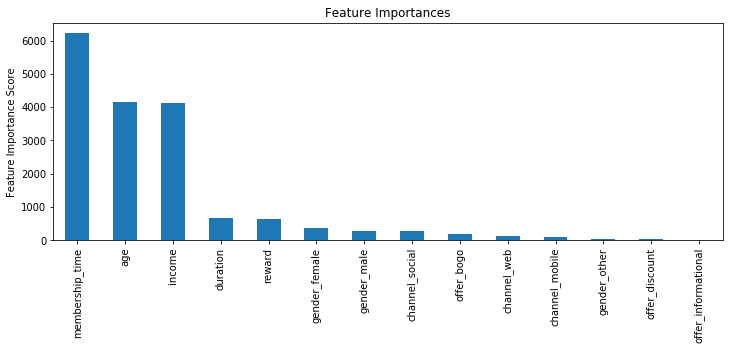

In [280]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=10,
 min_child_weight=1,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2, train, predictors)

#### Step 4: Tune `subsample` and `colsample_bytree`

In [285]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=10,
 min_child_weight=1, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch4.fit(train[predictors],train[target])
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

/Users/mengjialyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([4.81428554, 5.1006438 , 4.9318085 , 4.76593523, 5.47710593,
         5.42516701, 5.32895339, 5.01988192, 6.19345841, 6.0792419 ,
         5.85724454, 5.59313538, 6.45452967, 6.44293182, 6.15594692,
         6.2441534 ]),
  'std_fit_time': array([0.16334381, 0.06468541, 0.06426364, 0.04460995, 0.06067809,
         0.05504748, 0.09527931, 0.0822637 , 0.0785423 , 0.02874974,
         0.05611126, 0.06401961, 0.09263135, 0.10896421, 0.08173857,
         0.16863757]),
  'mean_score_time': array([0.03047111, 0.0302985 , 0.03141117, 0.03031411, 0.03199663,
         0.03222497, 0.0310699 , 0.03072209, 0.03448107, 0.03270264,
         0.03255053, 0.03040206, 0.03559661, 0.03484175, 0.03274693,
         0.03034389]),
  'std_score_time': array([0.0009042 , 0.00158155, 0.00117041, 0.00179511, 0.00104428,
         0.00177765, 0.00201808, 0.00138021, 0.00099067, 0.00194599,
         0.00110399, 0.00138275, 0.001068  , 0.0016684 , 0.00168041,
         0.00156325]),
  'param_c

We finds 0.7 as the optimum value for `colsample_bytree` and 0.8 as the `subsample`.

In [286]:
param_test5 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(65,80,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=10,
 min_child_weight=1, gamma=0.4, subsample=0.8, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch5.fit(train[predictors],train[target])

/Users/mengjialyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.7, gamma=0.4,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=10, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=1...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=1,
                                     seed=27, subsample=0.8, tree_metho

In [288]:
gsearch5.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([4.29809659, 4.43023484, 4.57210743, 5.11363895, 5.09967763,
         5.45414619, 5.47641046, 5.51596332, 5.07731781]),
  'std_fit_time': array([0.12167111, 0.11072592, 0.0755662 , 0.16494447, 0.10296349,
         0.12901271, 0.09402589, 0.06230067, 0.84021498]),
  'mean_score_time': array([0.02799907, 0.02792618, 0.0292104 , 0.03080528, 0.03085475,
         0.03094232, 0.03179793, 0.03230214, 0.02865942]),
  'std_score_time': array([0.00153588, 0.00122871, 0.00065518, 0.0006075 , 0.00066952,
         0.00089867, 0.00122846, 0.00206867, 0.00284701]),
  'param_colsample_bytree': masked_array(data=[0.65, 0.65, 0.65, 0.7, 0.7, 0.7, 0.75, 0.75, 0.75],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_subsample': masked_array(data=[0.75, 0.8, 0.85, 0.75, 0.8, 0.85, 0.75, 0.8, 0.85],
               mask=[False, False, False, False, False, False, Fals

Therefore the optimum values are:

subsample: 0.8
colsample_bytree: 0.7

#### Step 5: Tuning Regularization Parameter `reg_alpha`

`reg_alpha` controls the L1 regularization term on weights. Increasing this value will make model more conservative.

To avoid overfitting on the hyperparameter, we can limit `reg_alpha` not to be greater than 1. 

In [323]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-4, 1e-3,1e-2, 0.1, 1]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=10,
 min_child_weight=1, gamma=0.4, subsample=0.8, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch6.fit(train[predictors],train[target])
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

/Users/mengjialyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([4.48763711, 5.02467177, 5.10827084, 5.14615242, 5.15605063,
         5.29604297]),
  'std_fit_time': array([0.23628583, 0.12425847, 0.05358381, 0.03921802, 0.08101533,
         0.07417774]),
  'mean_score_time': array([0.02687702, 0.02956586, 0.02926266, 0.02997546, 0.02994881,
         0.0295167 ]),
  'std_score_time': array([0.00161362, 0.00205891, 0.00070436, 0.00055309, 0.00100229,
         0.00174602]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.0001},
   {'reg_alpha': 0.001},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1}],
  'split0_test_score': array([0.82360358, 0.82360253, 0.82133931, 0.82052003, 0.82143245,
         0.82397631]),
  'split1_test_score': array([0.80643078, 0.80736462, 0.80685644, 0.80523162, 0.8065046 ,
         

Therefore the optimum value for `reg_alpha` is 0.0001.


Again we can try values around .0001 to see if we get something better than it.

In [320]:
param_test7 = {
 'reg_alpha':[0.00005, 0.0001, 0.00015]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=10,
 min_child_weight=1, gamma=0.4, subsample=0.8, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test7, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch7.fit(train[predictors],train[target])
gsearch7.cv_results_, gsearch7.best_params_, gsearch7.best_score_

/Users/mengjialyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:825: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([4.69882681, 5.30197349, 5.08029203]),
  'std_fit_time': array([0.28601226, 0.08895607, 0.82576859]),
  'mean_score_time': array([0.02836709, 0.03134794, 0.03094492]),
  'std_score_time': array([0.00209903, 0.00145576, 0.00282507]),
  'param_reg_alpha': masked_array(data=[5e-05, 0.0001, 0.00015],
               mask=[False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 5e-05},
   {'reg_alpha': 0.0001},
   {'reg_alpha': 0.00015}],
  'split0_test_score': array([0.82360323, 0.82360253, 0.82360375]),
  'split1_test_score': array([0.80643078, 0.80736462, 0.80533974]),
  'split2_test_score': array([0.90188662, 0.90188679, 0.90116274]),
  'split3_test_score': array([1., 1., 1.]),
  'split4_test_score': array([0.30168595, 0.30265211, 0.30265194]),
  'split5_test_score': array([0.63286468, 0.63286537, 0.63286485]),
  'split6_test_score': array([0.99273098, 0.99273098, 0.99273377]),
  'split7_test_score': array([1., 1., 1

Therefore the optimal value for `reg_value` is 0.0001.


Model Report
Accuracy : 0.8816
AUC Score (Train): 0.953058


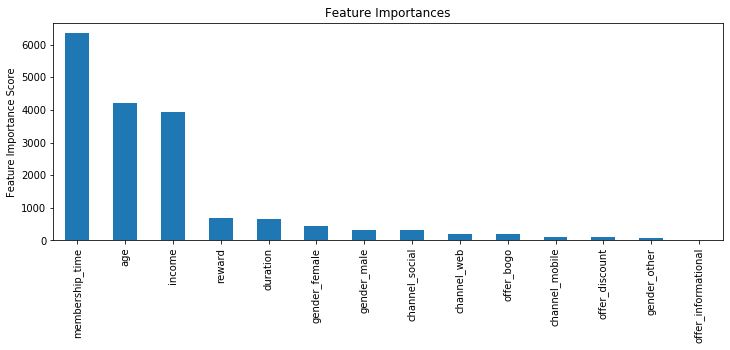

In [318]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=10,
 min_child_weight=1,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.7,
 reg_alpha=0.0001,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3, train, predictors)

#### Step 6: Reducing Learning Rate
Lastly, we should lower the learning rate and add more trees. 



Model Report
Accuracy : 0.8799
AUC Score (Train): 0.953107


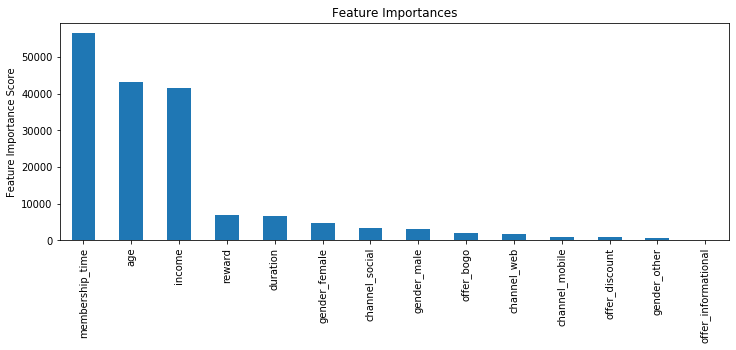

In [322]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=10,
 min_child_weight=1,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.7,
 reg_alpha=0.0001,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb4, train, predictors)


Accuracy: 80.60%


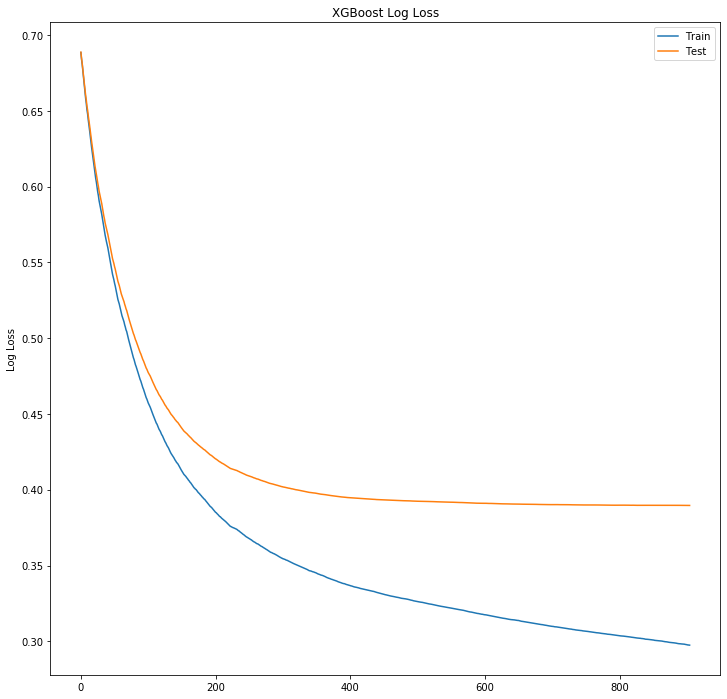

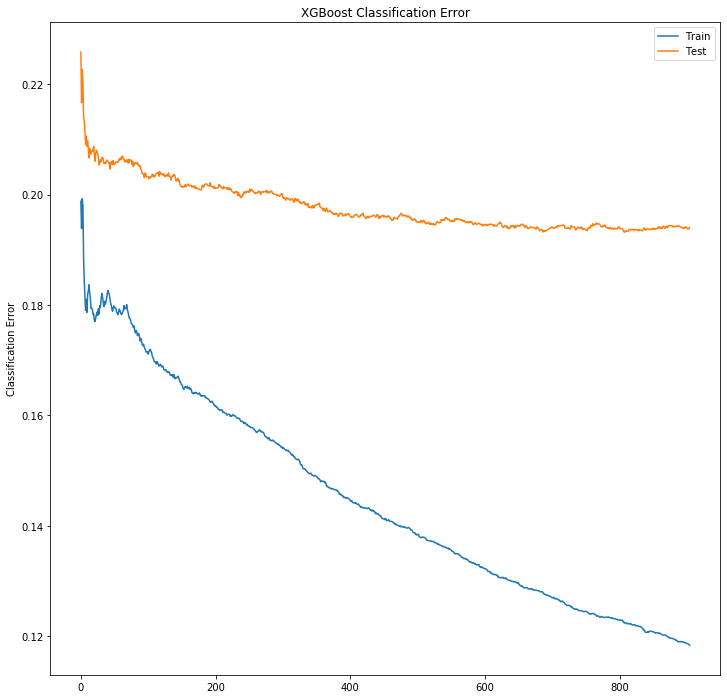

In [328]:
from matplotlib import pyplot
# retrieve performance metrics
eval_set = [(X_train, y_train), (X_test, y_test)]

xgb4.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)
    
# make predictions for test data
y_pred = xgb4.predict(X_test)
predictions = [round(value) for value in y_pred]
    
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
    
# retrieve performance metrics
results = xgb4.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
    
# plot log loss
fig, ax = pyplot.subplots(figsize=(12,12))
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
    
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
    
    
# plot classification error
fig, ax = pyplot.subplots(figsize=(12,12))
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
    
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

We can see that the log loss for unseen test data is as low as 0.4, and classification error for unseen test data is as low as 0.2.

 

With such low log loss and classification error in test data, we can conclude that the final model is robust and generalizes well to unseen data. Small perturbations in training data or the input space do not greatly affect the results. Therefore results from our model can be trusted to be reasonable and aligned with solution expectations, with appropriate final parameters. 